In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import pandas as pd
import numpy as np
import IPython
import graphviz
import re
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../data/ames"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

data_description.txt
sample_submission.csv
test.csv
train.csv



# **Random Forests are Great, but how do they work?**

<img src='http://www.earthtimes.org/newsimage/rising-temperatures-affect-forests-carbon-storage-role-study_265.jpg' />

**Wikipedia** defines random forests as: Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. 

## Table of Contents:

**1. [Decision Tree - Baby Steps](#section1)**  <br>
**2. [Real Data](#section2)**<br>
**3. [Decision Tree from scratch](#section3)**<br>
**4. [Nested Tree - TBD](#section4)**<br>
**5. [Ensemble of Trees- TBD](#section5)**<br>
**6. [Tree Confidence Intervals](#section6)**<br>
**7. [Feature Importance](#section7)**<br>
**8. [More or Less Features?](#section8)**<br>
**10. [Feature Contribution](#section10)**<br>

**Updated 12/7/2017 - added tree variance and feature importance at the bottom **

### **Summary: A Random Forest, like a real forest is made of trees** 

<img src='https://i1.wp.com/dataaspirant.com/wp-content/uploads/2017/04/Random-Forest-Introduction.jpg?resize=690%2C345' />
## **What is a Decision Tree?**
Decision tree learning uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). It is one of the predictive modelling approaches used in statistics, data mining and machine learning. Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.

### **Best way to understand one is to build one from scratch! Let's go!**

<a id='section1'></a>
# **1. Decision Tree by Hand**
<img src='https://eight2late.files.wordpress.com/2016/02/7214525854_733237dd83_z1.jpg?w=700' />
### **For our baby case lets work through a tiny dataset**

## **x = [1,2,3,4,5,6]**
## **y = [1,1,0,1,0,0]**

In [2]:
x = pd.DataFrame({'feature':[1,2,3,4,5,6]})
x_vec = np.array([1,2,3,4,5,6], dtype=int)
y = np.array([1,1,0,1,0,0], dtype=int)

###  **The Decision Tree Algorithm - in English**

1. Target: Looking for a division of the dataset where the groups are most evenly split. in this baby example, the ideal split has mostly `1`'s on one side and mostly `0`'s on other side
2. Will check every element and separate the set into a left handed group and a right handed group and calculate a 'purity' score
3. will loop and search for the **lowest** score

### **Let's go from scratch, step by step**
<img src='https://godmoneyandme.files.wordpress.com/2012/01/pencil-and-paper.jpg' />


### **i=1, Split at 1st element**

### **x = [1] // [2,3,4,5,6]**
### **y = [1] // [1,0,1,0,0]**


In [3]:
lhs_x = x_vec<=x_vec[0]
rhs_x = x_vec>x_vec[0]
lhs_y = y[lhs_x]
rhs_y = y[rhs_x]

print(lhs_x, rhs_x,lhs_y,rhs_y)

[ True False False False False False] [False  True  True  True  True  True] [1] [1 0 1 0 0]


### **i=1, Calculate the purity score**

$$\sigma_{ylhs}n_{xlhs} + \sigma_{yrhs}n_{xrhs} $$

The score is roughly the standard deviation of the y times the number of samples. Lets consider the extremes:

1. If the split is perfect, one side will have all 1's and the other will have all 0's, the deviations will equal =0 and the score will be zero
2. If the split is terrible, we will have a huge deviation times a large number of points that will give a very large score

In [4]:
np.std(lhs_y) * sum(lhs_x) + np.std(rhs_y) * sum(rhs_x)

2.4494897427831783


### **i=2, Calculate the purity score**

### **x = [1,2] // [3,4,5,6]**
### **y = [1,1] // [0,1,0,0]**


In [5]:
lhs_x = x_vec<=x_vec[1]
rhs_x = x_vec>x_vec[1]
lhs_y = y[lhs_x]
rhs_y = y[rhs_x]

print(lhs_x, rhs_x,lhs_y,rhs_y)

[ True  True False False False False] [False False  True  True  True  True] [1 1] [0 1 0 0]


In [6]:
np.std(lhs_y) * sum(lhs_x) + np.std(rhs_y) * sum(rhs_x)

1.7320508075688772

### **i=3, Split at 3rd element**


### **x = [1,2,3] // [4,5,6]**
### **y = [1,1,0] // [1,0,0]**


In [7]:
lhs_x = x_vec<=x_vec[2]
rhs_x = x_vec>x_vec[2]
lhs_y = y[lhs_x]
rhs_y = y[rhs_x]

print(lhs_x, rhs_x,lhs_y,rhs_y)
np.std(lhs_y) * sum(lhs_x) + np.std(rhs_y) * sum(rhs_x)

[ True  True  True False False False] [False False False  True  True  True] [1 1 0] [1 0 0]


2.82842712474619

### **Conclusion: it seems that element 2~3 is a good split, with 2 samples going left, and 4 going right!**

### **Let's compare to sklearn! We will use 1 decision tree with depth 1**


In [8]:
dtr = DecisionTreeRegressor(max_depth=1)
dtr.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### **Tree Drawing function**

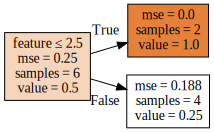

In [9]:
def draw_tree(t, df, size=10, ratio=0.6, precision=0):
    """ Draws a representation of a random forest in IPython.
    Parameters:
    -----------
    t: The tree you wish to draw
    df: The data used to train the tree. This is used to get the names of the features.
    """
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True,
                      special_characters=True, rotate=True, precision=precision)
    IPython.display.display(graphviz.Source(re.sub('Tree {',
       f'Tree {{ size={size}; ratio={ratio}', s)))
draw_tree(dtr, x, precision=3)

### **We see we are consistent with sklearn**

<a id='section2'></a>

# **2. On to the real Data:**

### **We will use Iowa Housing Data from this kaggle competition for the rest of our exploration**
<img src='https://www.reno.gov/Home/ShowImage?id=7739&t=635620964226970000' />

In [10]:
train_df = pd.read_csv('../data/ames/train.csv')
df_test = pd.read_csv('../data/ames/test.csv')

### **For simplicity lets choose only a few features**

In [11]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
sample_df = train_df[['SalePrice','YrSold','GrLivArea','TotRmsAbvGrd']].copy()
sample_df.head()

,SalePrice,YrSold,GrLivArea,TotRmsAbvGrd
0,208500,2008,1710,8
1,181500,2007,1262,6
2,223500,2008,1786,6
3,140000,2006,1717,7
4,250000,2008,2198,9


### **Split into X and y variables**


In [13]:
y_train = sample_df['SalePrice']
X_train = sample_df[[x for x in sample_df.columns if x != 'SalePrice']]
print(y_train.shape, X_train.shape)

(1460,) (1460, 3)


<a id='section2'></a>
# **3. Make a 1-level Decision Tree**
### **Sklearn: Make a Decision Tree with Depth 1**

In [14]:
dtr = DecisionTreeRegressor(max_depth=1)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

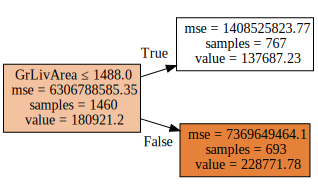

In [15]:
draw_tree(dtr, X_train, precision=2)

## **Splitting Algorithm : A simple loop**



###  **English**
1. Target: Looking for a division of the dataset where mostly 1's on one side and mostly 0's on other side
2. Will check every element and separate the set into a left handed group and a right handed group and calculate a 'purity' score
3. will loop and search for the lowest score

### **Score Calculation**:

    - left_grp_Ytrain_deviation * left_Xtrain_sum + right_grp_Ytrain_deviation * right_Xtrain_sum

### **Python Explicit Code: Setup**
- `feature_idx =1` : we can choose which feature we want to look at 
- `stored_score = float('inf')` : choose a very high starter score
- `stored_split_feature = 0` this is redundant right now, but it would be the idea feature to split on
- `stored_split_value = 0` - this is the actual data-frame value to split on, for us `GrLivArea` is in ft
- `all_indexes = [x for x in X_train.index]` : makes list of all possible indexes
- `feature_list = X_train.columns` - feature list of column names, for labeling

### **Datasetup**

- `x,y = X_train.iloc[all_indexes,feature_idx],y_train.values[all_indexes]` pulls out the actual values

### **Split logic: for a given index**

#### **X values split**
- `lhs_x = x<=x[split_index]` : for whatever split value you are at, how many values are less
- `rhs_x = x>x[split_index]` : how many values are above the selected value

#### **y values split**
- `lhs_y_std = y[lhs_x].std()` : the stdev of the left hand y values
- `rhs_x_std = y[rhs_x].std()` : the stdev of the right hand y values

#### **Calc the score**
- `curr_score = lhs_y_std*lhs_x.sum() + rhs_x_std*rhs_x.sum()` 

#### **If score is better, store the data**

```python
if curr_score<stored_score: 
    print('split index :%d lhs ct: %d | rhs ct: %d| %f' % (
        split_index,
        len(lhs_x),
        len(rhs_x),
        curr_score))
    stored_split_feature = feature_idx
    stored_score = curr_score
    stored_split_value = x[split_index]
```


## **3.1 Our Loop representation of a 1-level Tree**
<img src='http://www.onlineteachinghub.com/wp-content/uploads/2015/09/prog101-2.jpg' />

In [16]:
feature_idx =1
stored_score = float('inf')
stored_split_feature = 0
stored_split_value = 0

all_indexes = [x for x in X_train.index]

feature_list = X_train.columns
x,y = X_train.iloc[all_indexes,feature_idx],y_train.values[all_indexes]

print('start loop')
for split_index in range(1, x.shape[0]-1):
    lhs_x = x<=x[split_index]
    rhs_x = x>x[split_index]

    if rhs_x.sum()==0:
        continue
    else:
        lhs_y_std = y[lhs_x].std()
        rhs_y_std = y[rhs_x].std()

        curr_score = lhs_y_std*lhs_x.sum() + rhs_y_std*rhs_x.sum()
        
        if curr_score<stored_score: 
            print('split index :%d lhs ct: %d | rhs ct: %d| score: %f' % (split_index, sum(lhs_x),sum(rhs_x), curr_score))
            stored_split_feature = feature_idx
            stored_score = curr_score
            stored_split_value = x[split_index]


print(stored_score, feature_list[stored_split_feature], stored_split_value)

start loop
split index :1 lhs ct: 512 | rhs ct: 948| score: 93281398.205757
split index :2 lhs ct: 1101 | rhs ct: 359| score: 91804469.340026
split index :3 lhs ct: 1037 | rhs ct: 423| score: 91487146.514272
split index :5 lhs ct: 618 | rhs ct: 842| score: 90970171.513650
split index :6 lhs ct: 1008 | rhs ct: 452| score: 90944631.172519
split index :13 lhs ct: 778 | rhs ct: 682| score: 88899549.318965
split index :67 lhs ct: 755 | rhs ct: 705| score: 88506980.330170
split index :239 lhs ct: 767 | rhs ct: 693| score: 88277501.801643
88277501.80164349 GrLivArea 1487


### **We see we have the same answer! GrLiv Area around 1487 sqft!**

### **3.2 the Class version: Lets turn it into a class with a single function (still only doing 1 feature)**

<img src='http://4.bp.blogspot.com/-ANYNUQrNZug/T4FMIgqFMlI/AAAAAAAAACo/al-4GKDFawM/s1600/oop%5B1%5D.jpg' />

- **Tricky hard to change `variables` to `self.variables`:** be sure to keep track of these, its hard to find and replace all of them. I highly recommend restartting your kernel to make sure old variable values don't remain from a previous calculation and then fail to throw an error when prototyping your tree 

- **Dont repeat yourself** try to streamline as much as possible

- **Don't send data to functions in the same class**: when acting on the data, always use the `self.` versions. The persistence between functions (all functions can access the same data) will help avoid version issues and naming problems

In [17]:

class myIndecisionTree():
    def __init__(self,x,y):
        self.indexes = x.index
        self.x = x
        self.y = y
        self.feature_idx =1
        self.stored_score = float('inf')
        self.stored_split_feature = 0
        self.stored_split_value = 0
        self.feature_list = x.columns
    
    def find_split_in_single_feature(self, feature_idx):
        X_train = self.x
        y_train = self.y

        x,y = X_train.iloc[self.indexes,feature_idx],y_train.values[self.indexes]
        print('start loop')
        for split_index in range(1, self.x.shape[0]-1):
            lhs_x = x<=x[split_index]
            rhs_x = x>x[split_index]

            if rhs_x.sum()==0:
                print(self.stored_score, feature_list[self.stored_split_feature], self.stored_split_value)
            else:
                lhs_y_std = y[lhs_x].std()
                rhs_x_std = y[rhs_x].std()

                curr_score = lhs_y_std*lhs_x.sum() + rhs_x_std*rhs_x.sum()
                if curr_score<self.stored_score: 
                    print('split index :%d lhs ct: %d | rhs ct: %d| score: %f' % (split_index, sum(lhs_x),sum(rhs_x), curr_score))
                    self.stored_split_feature = feature_idx
                    self.stored_score = curr_score
                    self.stored_split_value = x[split_index]

        print(self.stored_score, self.feature_list[self.stored_split_feature], self.stored_split_value)


In [18]:
myTree = myIndecisionTree(X_train,y_train)
myTree.find_split_in_single_feature(1)

start loop
split index :1 lhs ct: 512 | rhs ct: 948| score: 93281398.205757
split index :2 lhs ct: 1101 | rhs ct: 359| score: 91804469.340026
split index :3 lhs ct: 1037 | rhs ct: 423| score: 91487146.514272
split index :5 lhs ct: 618 | rhs ct: 842| score: 90970171.513650
split index :6 lhs ct: 1008 | rhs ct: 452| score: 90944631.172519
split index :13 lhs ct: 778 | rhs ct: 682| score: 88899549.318965
split index :67 lhs ct: 755 | rhs ct: 705| score: 88506980.330170
split index :239 lhs ct: 767 | rhs ct: 693| score: 88277501.801643
88277501.80164349 GrLivArea 1487
88277501.80164349 GrLivArea 1487


### **3.3: Make a function for all features**

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/8/82/CPT-OOP-interfaces.svg/300px-CPT-OOP-interfaces.svg.png' />

Note that when we call this function we don't have to keep passing around updated scores or split values. That is taken care of by using the `self.` notation. 

In [19]:
class myIndecisionTree():
    def __init__(self,x,y):
        self.indexes = x.index
        self.x = x
        self.y = y
        # self.feature_idx =1
        self.stored_score = float('inf')
        self.stored_split_feature = 0
        self.stored_split_value = 0
        self.feature_list = x.columns

    
    # ======== NEW FUNCTION =========================
    def check_all_features(self):
        for i in range(len(feature_list)-1):
            self.find_split_in_single_feature(i)  
            
        print(self.stored_score, self.feature_list[self.stored_split_feature], self.stored_split_value)
    # ======== NEW FUNCTION =========================    
    
    def find_split_in_single_feature(self, feature_idx):
        X_train = self.x
        y_train = self.y

        x,y = X_train.iloc[self.indexes,feature_idx],y_train.values[self.indexes]
        print('start loop')
        for split_index in range(1, self.x.shape[0]-1):
            lhs_x = x<=x[split_index]
            rhs_x = x>x[split_index]

            if rhs_x.sum()==0:
                continue
            else:
                lhs_y_std = y[lhs_x].std()
                rhs_x_std = y[rhs_x].std()

                curr_score = lhs_y_std*lhs_x.sum() + rhs_x_std*rhs_x.sum()
                if curr_score<self.stored_score: 
                    print('split index :%d lhs ct: %d | rhs ct: %d| score: %f' % (split_index, sum(lhs_x),sum(rhs_x), curr_score))
                    self.stored_split_feature = feature_idx
                    self.stored_score = curr_score
                    self.stored_split_value = x[split_index]

        


### **Test it with a different data set - Single Decision Tree**

In [20]:
y_train = sample_df['SalePrice']
#X_train = sample_df[['GrLivArea']]
X_train = sample_df[[x for x in sample_df.columns if x not in ['SalePrice','GrLivArea']]]

In [21]:
dtr = DecisionTreeRegressor(max_depth=1)
dtr.fit(X_train,y_train)


DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### **Sklearn**

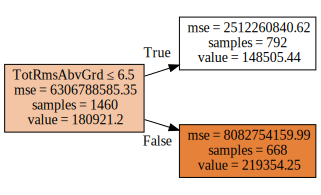

In [22]:
draw_tree(dtr, X_train, precision=2)

In [23]:
myTree = myIndecisionTree(X_train,y_train)
myTree.check_all_features()

start loop
split index :1 lhs ct: 643 | rhs ct: 817| score: 115781552.380532
start loop
split index :1 lhs ct: 792 | rhs ct: 668| score: 99752951.757499
99752951.75749913 TotRmsAbvGrd 6


<a id='section4'></a>
## **4. Making our multi-level tree!**
-- TBD

<a id='section5'></a>
## **5. Making our ensemble tree!**
-- TBD

<a id='section6'></a>
## 6. **Confidence Interval for Random Forests**

<img src='http://berkeleysciencereview.com/wp-content/uploads/2014/04/to_err_is_human_by_velica-d4i9wjr.jpg' />

How can we get an idea of how much the predictions will vary for a random forest? Is there a way to understand the range or prediction? Yes! Let's go through a quick walkthrough

### **Let's Setup a small subset of the data**

In [24]:
n = 100
indexes = [x for x in range(n)]
sample_df = train_df.loc[indexes,['SalePrice','YrSold','TotRmsAbvGrd','Neighborhood']].copy()
sample_df.head()

,SalePrice,YrSold,TotRmsAbvGrd,Neighborhood
0,208500,2008,8,CollgCr
1,181500,2007,6,Veenker
2,223500,2008,6,CollgCr
3,140000,2006,7,Crawfor
4,250000,2008,9,NoRidge


In [25]:
y_train = sample_df['SalePrice']
X_train = sample_df[[x for x in sample_df.columns if x not in ['SalePrice']]]
X_matrix = pd.get_dummies(X_train)

In [26]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=10, max_depth=3)
rfr.fit(X_matrix, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### ** Note ! The underlying trees are very different!******

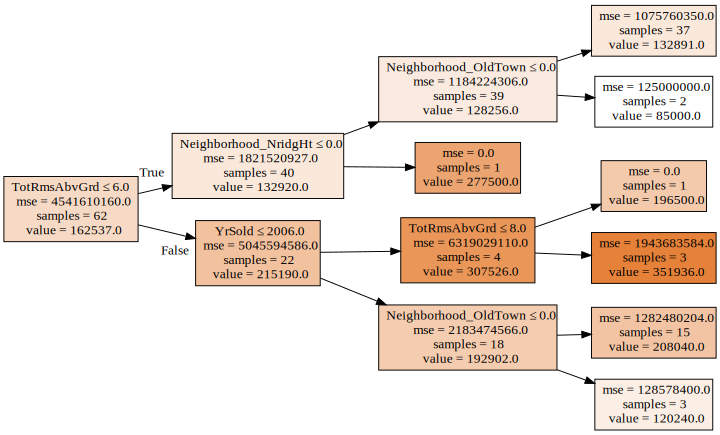

In [27]:
draw_tree(rfr.estimators_[0], X_matrix)

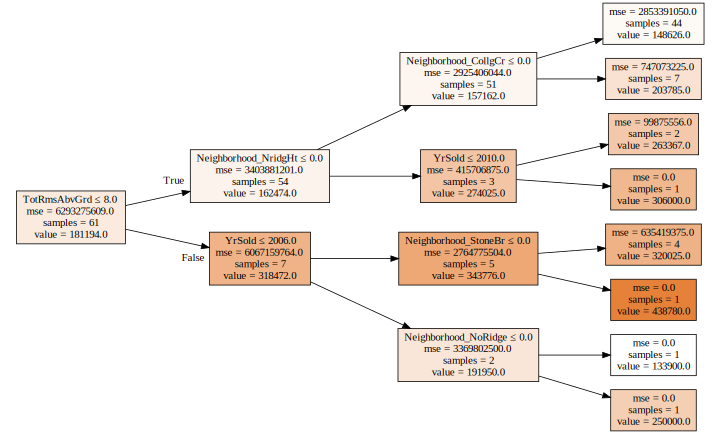

In [28]:
draw_tree(rfr.estimators_[1], X_matrix)

## **Since  Every Tree is Different, every prediction for the same point will vary as well **
<img src='http://monstermathclub.com/wp-content/uploads/2017/02/types-of-trees-delightful-miti-types-of-trees-mbetula-birch-mchikichi-palm-tree-mfune-beech-tree.jpg'  style='width:500px'/>

### **Let's collect the individual predictions by tree **

In [29]:
y_pred = rfr.predict(X_matrix)
all_trees = rfr.estimators_
all_predictions = [tree.predict(X_matrix) for tree in all_trees]
for x in all_predictions:
    print(len(x))

100
100
100
100
100
100
100
100
100
100


### ** Stack them into a single array **

In [30]:
all_predictions_by_point = np.stack(all_predictions, axis=0)
print(all_predictions_by_point.shape)

(10, 100)


### ** Let's work through a single point sample, calculate a 95% Confidence interval**

In [31]:
point_30 = [x[30] for x in all_predictions_by_point]
point_30 = sorted(point_30)
point_30

[78333.33333333333,
 132890.57142857142,
 134339.68253968254,
 136479.66101694916,
 139611.2068965517,
 142177.67272727273,
 142287.85074626867,
 145490.1052631579,
 148625.661971831,
 161590.36144578314]

In [32]:
ci_percent = 95
np.percentile(point_30, (100-ci_percent) / 2 )

90608.7119047619

In [33]:
np.percentile(point_30, 100-(100-ci_percent) / 2 )

158673.30406414391

### ** Now lets calc the CI's for the rest of the samples and Collect in a table**

<img src='http://1.bp.blogspot.com/-S4ypXNVNeh0/VwmnJBXJ3ZI/AAAAAAAACas/AgWJ5aLwl7QFEkOYPgzDtBV8_HOAZFHQg/s1600/Garfield-1.jpg' />

In [34]:
ci_percent= 95
ci_down = np.percentile(all_predictions_by_point, (100-ci_percent) / 2 , axis=0)
ci_up = np.percentile(all_predictions_by_point, 100-(100-ci_percent) / 2 , axis=0)

tree_ci = pd.DataFrame({
    'x' : [x for x in range(n)],
    'y_actual' : y_train,
    'y_pred' :y_pred,
    'y_95' : ci_up,
    'y_05' : ci_down,
    'y_ci_range' : ci_up-ci_down
})

tree_ci.sort_values(by='y_actual', inplace=True)
tree_ci['x_sorted'] = [x for x in range(n)]
tree_ci.head()

,x,y_05,y_95,y_actual,y_ci_range,y_pred,x_sorted
30,30,90608.711905,158673.304064,40000,68064.592159,136182.610737,0
29,29,133216.621429,158673.304064,68500,25456.682636,142113.468515,1
68,68,96101.428571,158673.304064,80000,62571.875493,137324.411372,2
39,39,133216.621429,158673.304064,82000,25456.682636,142113.468515,3
98,98,133216.621429,158673.304064,83000,25456.682636,142113.468515,4


### **Now lets plot our intervals! Note that we chose a low-level forest**

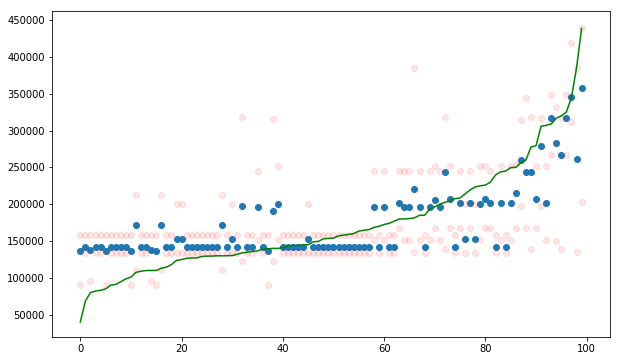

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.scatter(tree_ci['x_sorted'], tree_ci['y_pred'])
ax.plot(tree_ci['x_sorted'], tree_ci['y_actual'], c='green')
ax.scatter(tree_ci['x_sorted'], tree_ci['y_05'], c='red', alpha='0.1')
ax.scatter(tree_ci['x_sorted'], tree_ci['y_95'], c='red', alpha='0.1')


### **Now lets plot our intervals! Note that we chose a low-level forest**

In [36]:
x_index_top20_widest = tree_ci.sort_values(by='y_ci_range', ascending=False)[:20]['x'].values

In [37]:
worst_datapoints_w_features = X_train.iloc[x_index_top20_widest,:]
worst_datapoints_w_features.head(5)

,YrSold,TotRmsAbvGrd,Neighborhood
53,2006,5,Veenker
1,2007,6,Veenker
58,2006,10,StoneBr
93,2007,9,OldTown
63,2010,9,OldTown


## ** Which specific attributes lead to more uncertainty?**

<img src='https://hopewissel.files.wordpress.com/2016/04/6a00d8341ca4d953ef01b7c7c17599970b.jpg'  style='width:300px'/>

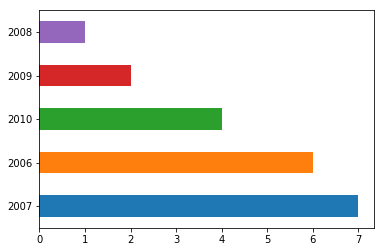

In [38]:
X_train.iloc[x_index_top20_widest,:]['YrSold'].value_counts().plot.barh()

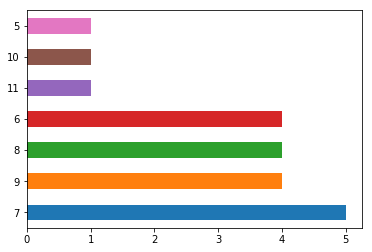

In [39]:
X_train.iloc[x_index_top20_widest,:]['TotRmsAbvGrd'].value_counts().plot.barh()

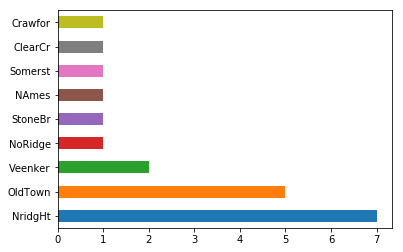

In [40]:
X_train.iloc[x_index_top20_widest,:]['Neighborhood'].value_counts().plot.barh()

<a id='section7'></a>
# **7. Features: Not all of them are important**

<img src='http://www.mirchu.net/wp-content/uploads/2014/09/iPhone-6-important-features.png' />

## **How do we determine what are the important features?**

Let's prep and train the data as before

In [41]:
n = 100
indexes = [x for x in range(n)]
sample_df = train_df.loc[indexes,['SalePrice','YrSold','TotRmsAbvGrd','Neighborhood']].copy()
y_train = sample_df['SalePrice']
X_train = sample_df[[x for x in sample_df.columns if x not in ['SalePrice']]]
X_matrix = pd.get_dummies(X_train)
rfr = RandomForestRegressor()
rfr.fit(X_matrix,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

## **Define our Metric**

In [42]:
from sklearn.metrics import mean_squared_error
def rmse(x1,x2):
    return np.sqrt(mean_squared_error(x1,x2))

y_pred = rfr.predict(X_matrix)
orig_score = rmse(y_pred,y_train)
orig_score

23763.081912145197

## **Our Approach: Jumble one column and see how the prediction changes**

<img src='https://lh3.ggpht.com/_oZ6h3pArsOdjbJZ1GCNTlpcvnsO9PU0wjpAuRuhxNBkI2CMxnMjDydm82-AiNqGEYqZ=w300' />

In [43]:
def jumble_column(df, column_name):
    idx = X_matrix.index
    scrambled_idx = np.random.permutation(idx)
    jumbled = df.copy()
    values = jumbled[column_name].values
    jumbled[column_name] = values[scrambled_idx]
    return jumbled

X_jumble_year = jumble_column(X_matrix,'YrSold')
y_pred = rfr.predict(X_jumble_year)
jumbled_year_score = rmse(y_pred,y_train)
jumbled_year_score - orig_score

7616.070382443864

In [44]:
X_jumble_rm = jumble_column(X_matrix,'TotRmsAbvGrd')
y_pred = rfr.predict(X_jumble_rm)
jumbled_rm_score = rmse(y_pred,y_train)
jumbled_rm_score - orig_score

33907.4645849744

In [45]:
X_jumble_ngh = jumble_column(X_train,'Neighborhood')
X_jumble_ngh = pd.get_dummies(X_jumble_ngh)
y_pred = rfr.predict(X_jumble_ngh)
jumbled_ngh_score = rmse(y_pred,y_train)
jumbled_ngh_score - orig_score

48110.36702093952

## **Finally we see that Neighborhood matters the most, then number of rooms**

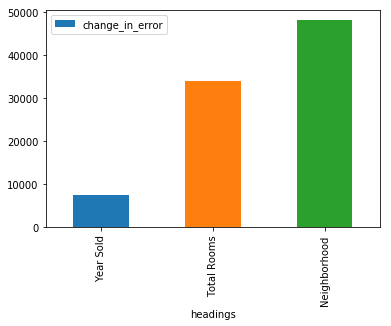

In [46]:
to_plot= pd.DataFrame({'headings' : ['Year Sold', 'Total Rooms', 'Neighborhood'],
              'change_in_error':[jumbled_year_score-orig_score, jumbled_rm_score-orig_score, jumbled_ngh_score-orig_score]
             })

to_plot.plot.bar('headings','change_in_error')

 ## **But what about specific neighborhoods?**
 
 <img src='https://s3.amazonaws.com/lowres.cartoonstock.com/social-issues-skid_row-muggings-criminal-bad_neighbourhood-bad_neighborhood-ksmn3365_low.jpg' />
 
#### **Will jumble the one-hot encoded variables instead of the full categorical column**

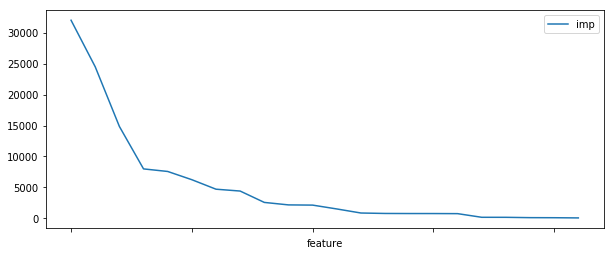

In [47]:
def jumble_score(df, column_name, model):
    orig_predict = model.predict(df)
    orig_score = rmse(orig_predict,y_train)
    tmp_jumble = jumble_column(df,column_name)
    tmp_predict = model.predict(tmp_jumble) 
    return rmse(tmp_predict,y_train) - orig_score
    
scores =[]
for col in X_matrix:
    scores.append({'feature': col,
                   'imp': jumble_score(X_matrix, col, rfr) 
                  })
pd.DataFrame(scores).sort_values(by='imp', ascending=False).plot('feature','imp', figsize=(10,4))

### **Let's see what SKLearn has to say**

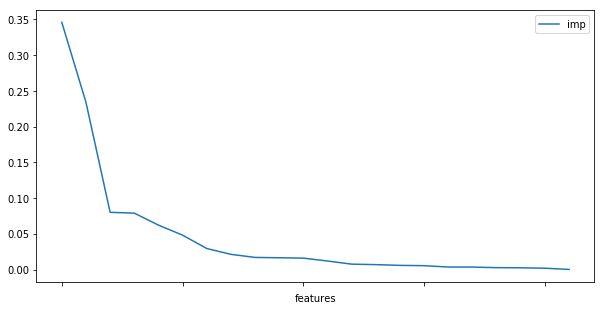

In [48]:
rfr = RandomForestRegressor(n_jobs=-1)
rfr.fit(X_matrix,y_train)
feat_imp = pd.DataFrame({
    'features': X_matrix.columns,
    'imp' :rfr.feature_importances_
})
feat_imp.sort_values(by='imp', inplace=True, ascending=False)
feat_imp.plot('features','imp', figsize=(10,5))

<a id='section8'></a>
# **8. Reducing Features?**

<img src='https://www.homedepot.com/hdus/en_US/DTCCOMNEW/fetch/DIY_Projects_and_Ideas/Outdoor/Guides/1440-desktop-pruning-hero.jpg' />
Sometimes there's a lot of features. And you may suspect that some of them are the same. How can we trim down the feature selection?


#### ** Let's train another baseline RF model to get some baseline importance** 

In [49]:
y_feat = train_df['SalePrice'].values
features = [x  for x in train_df.columns.values if x not in ['SalePrice','GarageYrBlt','LotFrontage','MasVnrArea']]
x_feat = train_df[features]
x_feat_matrix = pd.get_dummies(x_feat)

In [50]:
m_rf = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m_rf.fit(x_feat_matrix,y_feat)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [51]:
m_rf.score(x_feat_matrix, y_feat)

0.9586813574024605

#### **From the RF object, we can pull feature importance and plot**

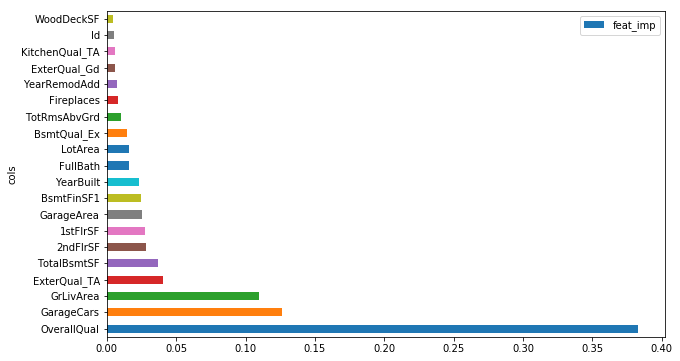

In [52]:
feature_imp = m_rf.feature_importances_
feature_imp_df = pd.DataFrame({'cols':x_feat_matrix.columns.values, 'feat_imp':feature_imp})
feature_imp_df.sort_values(by='feat_imp', ascending=False, inplace=True)
feature_imp_df[:20].plot.barh(x='cols', y='feat_imp',figsize=(10,6))


### **Keep top features, and re-run the model. Checking to see if the feature importance re-distributes at all**

In [53]:
to_keep = feature_imp_df[feature_imp_df['feat_imp'] > 0.01].cols
X_bestfeat_matrix = x_feat_matrix[to_keep]

In [54]:
m_best = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m_best.fit(X_bestfeat_matrix, y_feat)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

#### **We do note that the columns have changed as well as the order. That means some of the fields have absorbed some of the smaller importances into their score**

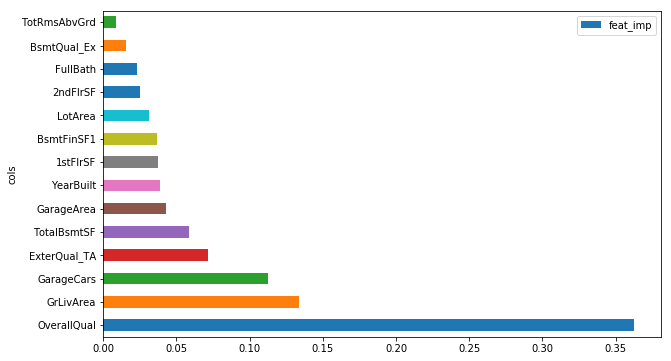

In [55]:
feature_imp = m_best.feature_importances_
feature_imp_df = pd.DataFrame({'cols':X_bestfeat_matrix.columns.values, 'feat_imp':feature_imp})
feature_imp_df.sort_values(by='feat_imp', ascending=False, inplace=True)
feature_imp_df[:20].plot.barh(x='cols', y='feat_imp',figsize=(10,6))


### **Another way to see the "hierarchy" of features : Dendrograms**

Here's the process, first of all, the **spearman** coefficient is used to compare columns. Spearman's coefficient looks at **RANK** instead of actual distance. So if one dataset had an outlier 10x, it would not affect its RANK when looking at the order. So this `scipy` library will iteratively compare columns (features) to one another and compare if the ranks are very similiar. If they are, they will be grouped together on the same branch

<img src = 'https://camo.githubusercontent.com/bc269d7bd72e9ba9e5af0957b2fbad1883aaf2bc/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f7468756d622f342f34652f53706561726d616e5f666967312e7376672f33303070782d53706561726d616e5f666967312e7376672e706e67'>

In [56]:
import scipy
from scipy.cluster import hierarchy as hc

#### **More rooms = more Squarefoot, More Garage Area = Garage Cars, Total Basement SQFT = 1st Flr SQFT**

So intepretting the chart below we some see of the columns are very closely related.
- this affects feature importance, because it is split over two columns instead of 1
- if we reduce the features and then recalculate, chances are the relative importance to "overall qualit" will increase
- Is a good way to eliminate features post-modeling

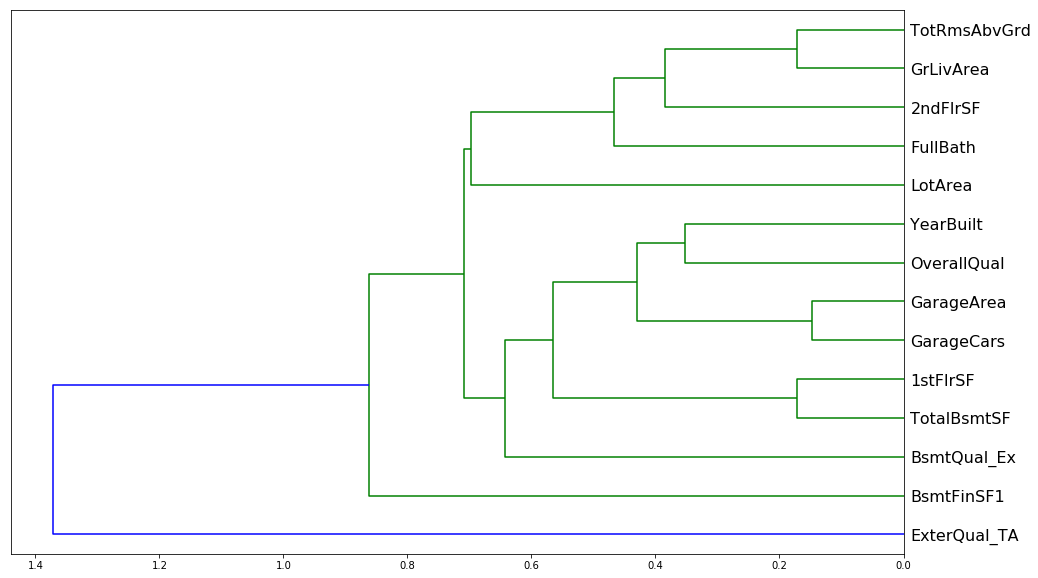

In [57]:
corr = np.round(scipy.stats.spearmanr(X_bestfeat_matrix).correlation, 3)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=X_bestfeat_matrix.columns, orientation='left', leaf_font_size=16)
plt.show()

<a id='section10'></a>
## **10. Can we Quantify the $ of the decisions with in a Tree?**

<img src='https://www.payoff.com/lift/articles/wp-content/uploads/2015/02/how-to-make-smart-money-decisions-810x355.jpg' />

#### ** how much does each factor contribute to the overall score? **

In [58]:
rfr = RandomForestRegressor(n_jobs=-1, max_depth=5)
rfr.fit(X_matrix,y_train)
single_row = X_matrix.head(1)
single_tree = rfr.estimators_[0]
single_tree.predict(single_row)

array([221416.66666667])

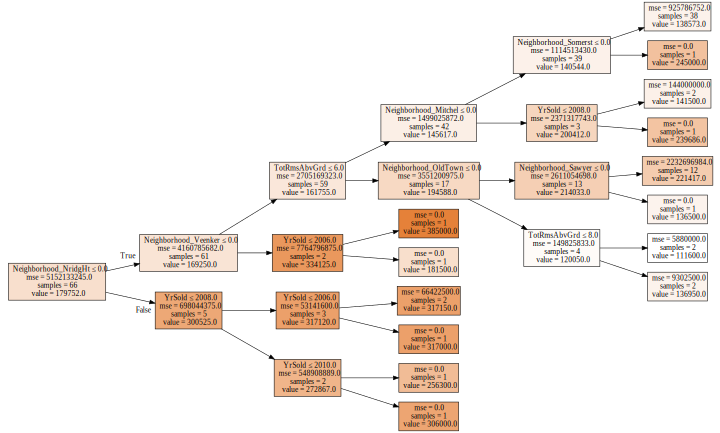

In [59]:
draw_tree(single_tree, X_matrix)

In [60]:
import numpy as np
import sklearn

from sklearn.ensemble.forest import ForestClassifier, ForestRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, _tree
from distutils.version import LooseVersion
if LooseVersion(sklearn.__version__) < LooseVersion("0.17"):
    raise Exception("treeinterpreter requires scikit-learn 0.17 or later")


def _get_tree_paths(tree, node_id, depth=0):
    """
    Returns all paths through the tree as list of node_ids
    """
    if node_id == _tree.TREE_LEAF:
        raise ValueError("Invalid node_id %s" % _tree.TREE_LEAF)

    left_child = tree.children_left[node_id]
    right_child = tree.children_right[node_id]

    if left_child != _tree.TREE_LEAF:
        left_paths = _get_tree_paths(tree, left_child, depth=depth + 1)
        right_paths = _get_tree_paths(tree, right_child, depth=depth + 1)

        for path in left_paths:
            path.append(node_id)
        for path in right_paths:
            path.append(node_id)
        paths = left_paths + right_paths
    else:
        paths = [[node_id]]
    return paths


def _predict_tree(model, X, joint_contribution=False):
    """
    For a given DecisionTreeRegressor, DecisionTreeClassifier,
    ExtraTreeRegressor, or ExtraTreeClassifier,
    returns a triple of [prediction, bias and feature_contributions], such
    that prediction ≈ bias + feature_contributions.
    """
    leaves = model.apply(X)
    paths = _get_tree_paths(model.tree_, 0)

    for path in paths:
        path.reverse()

    leaf_to_path = {}
    #map leaves to paths
    for path in paths:
        leaf_to_path[path[-1]] = path         
    
    # remove the single-dimensional inner arrays
    values = model.tree_.value.squeeze()
    # reshape if squeezed into a single float
    if len(values.shape) == 0:
        values = np.array([values])
    if isinstance(model, DecisionTreeRegressor):
        biases = np.full(X.shape[0], values[paths[0][0]])
        line_shape = X.shape[1]
    elif isinstance(model, DecisionTreeClassifier):
        # scikit stores category counts, we turn them into probabilities
        normalizer = values.sum(axis=1)[:, np.newaxis]
        normalizer[normalizer == 0.0] = 1.0
        values /= normalizer

        biases = np.tile(values[paths[0][0]], (X.shape[0], 1))
        line_shape = (X.shape[1], model.n_classes_)
    direct_prediction = values[leaves]
    
    
    #make into python list, accessing values will be faster
    values_list = list(values)
    feature_index = list(model.tree_.feature)
    
    contributions = []
    if joint_contribution:
        for row, leaf in enumerate(leaves):
            path = leaf_to_path[leaf]
            
            
            path_features = set()
            contributions.append({})
            for i in range(len(path) - 1):
                path_features.add(feature_index[path[i]])
                contrib = values_list[path[i+1]] - \
                         values_list[path[i]]
                #path_features.sort()
                contributions[row][tuple(sorted(path_features))] = \
                    contributions[row].get(tuple(sorted(path_features)), 0) + contrib
        return direct_prediction, biases, contributions
        
    else:

        for row, leaf in enumerate(leaves):
            for path in paths:
                if leaf == path[-1]:
                    break
            
            contribs = np.zeros(line_shape)
            for i in range(len(path) - 1):
                
                contrib = values_list[path[i+1]] - \
                         values_list[path[i]]
                contribs[feature_index[path[i]]] += contrib
            contributions.append(contribs)
    
        return direct_prediction, biases, np.array(contributions)


def _predict_forest(model, X, joint_contribution=False):
    """
    For a given RandomForestRegressor, RandomForestClassifier,
    ExtraTreesRegressor, or ExtraTreesClassifier returns a triple of
    [prediction, bias and feature_contributions], such that prediction ≈ bias +
    feature_contributions.
    """
    biases = []
    contributions = []
    predictions = []

    
    if joint_contribution:
        
        for tree in model.estimators_:
            pred, bias, contribution = _predict_tree(tree, X, joint_contribution=joint_contribution)

            biases.append(bias)
            contributions.append(contribution)
            predictions.append(pred)
        
        
        total_contributions = []
        
        for i in range(len(X)):
            contr = {}
            for j, dct in enumerate(contributions):
                for k in set(dct[i]).union(set(contr.keys())):
                    contr[k] = (contr.get(k, 0)*j + dct[i].get(k,0) ) / (j+1)

            total_contributions.append(contr)    
            
        for i, item in enumerate(contribution):
            total_contributions[i]
            sm = sum([v for v in contribution[i].values()])
                

        
        return (np.mean(predictions, axis=0), np.mean(biases, axis=0),
            total_contributions)
    else:
        for tree in model.estimators_:
            pred, bias, contribution = _predict_tree(tree, X)

            biases.append(bias)
            contributions.append(contribution)
            predictions.append(pred)
        
        
        return (np.mean(predictions, axis=0), np.mean(biases, axis=0),
            np.mean(contributions, axis=0))


def predict(model, X, joint_contribution=False):
    """ Returns a triple (prediction, bias, feature_contributions), such
    that prediction ≈ bias + feature_contributions.
    Parameters
    ----------
    model : DecisionTreeRegressor, DecisionTreeClassifier,
        ExtraTreeRegressor, ExtraTreeClassifier,
        RandomForestRegressor, RandomForestClassifier,
        ExtraTreesRegressor, ExtraTreesClassifier
    Scikit-learn model on which the prediction should be decomposed.
    X : array-like, shape = (n_samples, n_features)
    Test samples.
    
    joint_contribution : boolean
    Specifies if contributions are given individually from each feature,
    or jointly over them
    Returns
    -------
    decomposed prediction : triple of
    * prediction, shape = (n_samples) for regression and (n_samples, n_classes)
        for classification
    * bias, shape = (n_samples) for regression and (n_samples, n_classes) for
        classification
    * contributions, If joint_contribution is False then returns and  array of 
        shape = (n_samples, n_features) for regression or
        shape = (n_samples, n_features, n_classes) for classification, denoting
        contribution from each feature.
        If joint_contribution is True, then shape is array of size n_samples,
        where each array element is a dict from a tuple of feature indices to
        to a value denoting the contribution from that feature tuple.
    """
    # Only single out response variable supported,
    if model.n_outputs_ > 1:
        raise ValueError("Multilabel classification trees not supported")

    if (isinstance(model, DecisionTreeClassifier) or
        isinstance(model, DecisionTreeRegressor)):
        return _predict_tree(model, X, joint_contribution=joint_contribution)
    elif (isinstance(model, ForestClassifier) or
          isinstance(model, ForestRegressor)):
        return _predict_forest(model, X, joint_contribution=joint_contribution)
    else:
        raise ValueError("Wrong model type. Base learner needs to be a "
                         "DecisionTreeClassifier or DecisionTreeRegressor.")

## **Below i'm using the `predict` function from the tree interpreter package.**
https://github.com/andosa/treeinterpreter
This great package decomposes the tree into a number of components

In [61]:
prediction, bias, contributions = predict(single_tree, X_matrix)

### ** We now have a table of contributions. Each row is a sample, and every column is a field and the $ contribution to the predicted sale price**

In [62]:
contribution_matrix =  pd.DataFrame(contributions, columns=X_matrix.columns)
contribution_matrix['bias'] = bias

tmp_sums = contribution_matrix.sum()
nonzero_cols = tmp_sums[tmp_sums!=0].index

contribution_matrix[nonzero_cols].head(5)

,YrSold,TotRmsAbvGrd,Neighborhood_Mitchel,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_Somerst,Neighborhood_Veenker,bias
0,0.0,32832.726489,0.000000,-10502.036522,19444.677661,7384.057971,0.000000,-7494.338933,179751.58
1,-152625.0,0.000000,0.000000,-10502.036522,0.000000,0.000000,0.000000,164875.456522,179751.58
2,0.0,-16138.119800,-5073.566227,-10502.036522,0.000000,0.000000,-1970.877009,-7494.338933,179751.58
3,0.0,32832.726489,0.000000,-10502.036522,19444.677661,7384.057971,0.000000,-7494.338933,179751.58
4,0.0,32832.726489,0.000000,-10502.036522,19444.677661,7384.057971,0.000000,-7494.338933,179751.58


## **Let's Check to make sure the addition of the components equal the prediction below**

In [63]:
contribution_matrix[nonzero_cols].head(4).sum(axis=1)

0    221416.666667
1    181500.000000
2    138572.641509
3    221416.666667
dtype: float64

In [64]:
prediction[[0,1,2,3,4]]

array([221416.66666667, 181500.        , 138572.64150943, 221416.66666667,
       221416.66666667])